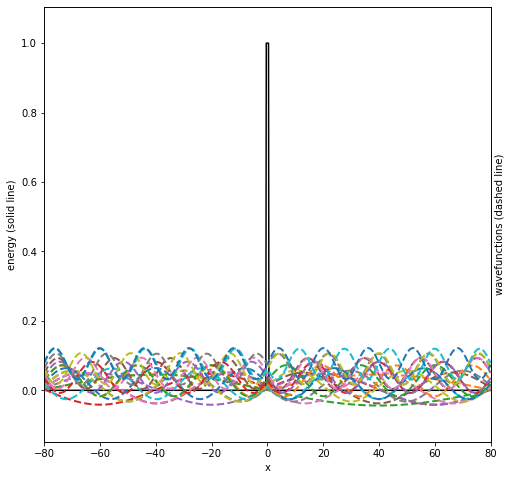

In [1]:
import numpy as np
from numpy import arctan,pi
from scipy import linalg as lg
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

def pulse(x,L):
    return -np.heaviside(x-L/2,1) + np.heaviside(x+L/2,1)

def V(x,b):
    return 1.*pulse(x,b)
    
N = 1000       # number of discrete points on the spatial grid
x = np.linspace(-80,80,N)
dx = x[1]-x[0]
b=1

# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x,b)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
# ...... that's it! ....... 

eigenmodes = eigvecs.T

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,V(x,b),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')

for i in range(20):
    ax.plot(x,eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

In [2]:
# ---------------------------------
def evolve(wavepacket,t):
    # this needs us to have already solved for the eigenmodes and eigen-energies    
    output = 0
    for i in range(len(wavepacket)):
        output += np.dot(eigenmodes[i],wavepacket) *eigenmodes[i]*np.exp(-1j*eigen_energies[i]*t) 
    return output

# ......... that's it ! ...........

def E_avg(wavepacket):
    # this just calculates <E> for a given wavefunction
    wavepacket = np.matrix(wavepacket)
    return np.abs( np.trace( wavepacket*(K_matrix+V_matrix)*wavepacket.H) / np.trace(wavepacket *wavepacket.H) )

First let's try an energy that we know is well above the barrier.

In [3]:
k_0=4
W0 = np.exp(-(x+10)**2/2.**2)*np.exp(1j*k_0*x)                     # initial wavefunction
W0 = W0/np.sqrt( np.trapz(np.abs(W0)**2,x) )    # normalize W0 so that it is a proper probability density

# check if wavefunction remains normalized during the time evolution
print(f"Initial integral of pdf = {np.trapz(np.abs(W0)**2,x):.6f}")
print(f"@ t=10000, integral of pdf = {np.trapz(np.abs(evolve(W0,10000))**2,x):.6f}")


# check if <E> remains conserved during the time evolution
print(f"Initial value of <E> = {E_avg(W0):.6f}")
print(f"@ t=10000, value of <E> = {E_avg(evolve(W0,10000)):.6f}")

Initial integral of pdf = 1.000000
@ t=10000, integral of pdf = 0.998449
Initial value of <E> = 7.830156
@ t=10000, value of <E> = 7.830156


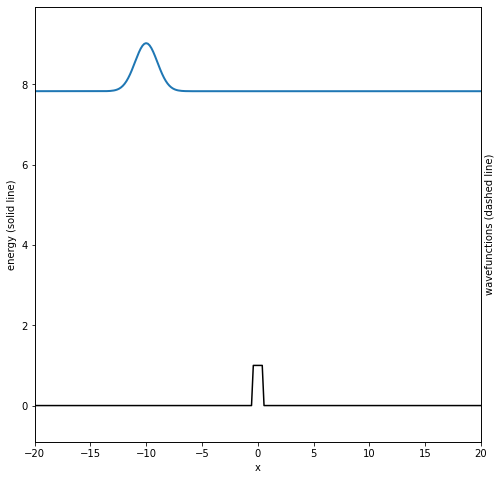

In [4]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,V(x,b),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.set_xlim(-20,20)

line, = ax.plot(x,3*np.abs(W0)**2 + E_avg(W0),lw=2)
ax.margins(0,0.1)

def animate(i):
    line.set_data(x,3*np.abs(evolve(W0,i/5))**2 + E_avg(W0))

ani = animation.FuncAnimation(fig, animate, frames=50)
HTML(ani.to_jshtml())

Next let's try an enegy that is kinda close to the barrier

In [5]:
k_0=2.5
W0 = np.exp(-(x+10)**2/2.**2)*np.exp(1j*k_0*x)                     # initial wavefunction
W0 = W0/np.sqrt( np.trapz(np.abs(W0)**2,x) )    # normalize W0 so that it is a proper probability density

# check if wavefunction remains normalized during the time evolution
print(f"Initial integral of pdf = {np.trapz(np.abs(W0)**2,x):.6f}")
print(f"@ t=10000, integral of pdf = {np.trapz(np.abs(evolve(W0,10000))**2,x):.6f}")


# check if <E> remains conserved during the time evolution
print(f"Initial value of <E> = {E_avg(W0):.6f}")
print(f"@ t=10000, value of <E> = {E_avg(evolve(W0,10000)):.6f}")

Initial integral of pdf = 1.000000
@ t=10000, integral of pdf = 0.999886
Initial value of <E> = 3.198401
@ t=10000, value of <E> = 3.198401


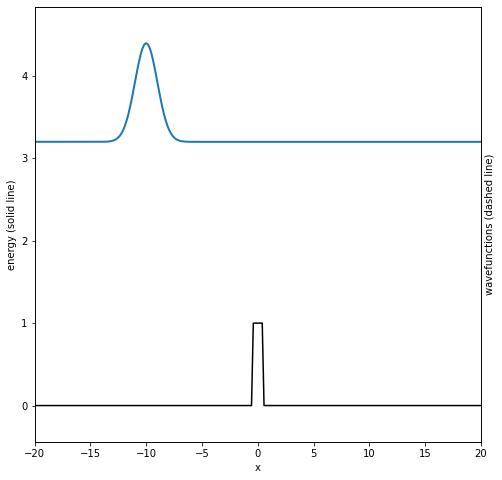

In [6]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,V(x,b),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.set_xlim(-20,20)

line, = ax.plot(x,3*np.abs(W0)**2 + E_avg(W0),lw=2)
ax.margins(0,0.1)

def animate(i):
    line.set_data(x,3*np.abs(evolve(W0,i/5))**2 + E_avg(W0))

ani = animation.FuncAnimation(fig, animate, frames=50)
HTML(ani.to_jshtml())

And finally let's try an energy that is below the barrier!

In [7]:
k_0=0.9
W0 = np.exp(-(x+10)**2/2.**2)*np.exp(1j*k_0*x)                     # initial wavefunction
W0 = W0/np.sqrt( np.trapz(np.abs(W0)**2,x) )    # normalize W0 so that it is a proper probability density

# check if wavefunction remains normalized during the time evolution
print(f"Initial integral of pdf = {np.trapz(np.abs(W0)**2,x):.6f}")
print(f"@ t=10000, integral of pdf = {np.trapz(np.abs(evolve(W0,10000))**2,x):.6f}")


# check if <E> remains conserved during the time evolution
print(f"Initial value of <E> = {E_avg(W0):.6f}")
print(f"@ t=10000, value of <E> = {E_avg(evolve(W0,10000)):.6f}")

Initial integral of pdf = 1.000000
@ t=10000, integral of pdf = 0.999946
Initial value of <E> = 0.527805
@ t=10000, value of <E> = 0.527805


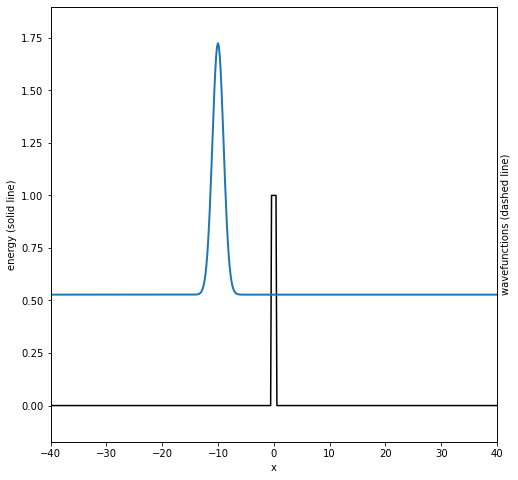

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,V(x,b),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.set_xlim(-40,40)

line, = ax.plot(x,3*np.abs(W0)**2 + E_avg(W0),lw=2)
ax.margins(0,0.1)

def animate(i):
    line.set_data(x,3*np.abs(evolve(W0,i))**2 + E_avg(W0))

ani = animation.FuncAnimation(fig, animate, frames=50)
HTML(ani.to_jshtml())

In [9]:
index=np.where(x>b/2.)[0][0]
np.trapz(np.abs(evolve(W0,30)[index:])**2,x[index:]) #integral of the transmitted packet 

0.3843719277697131